# Pizza maker

Specify the topping to create the texture for your favorite pizza.

In [2]:
import os
assets_dir = os.path.abspath(".") 

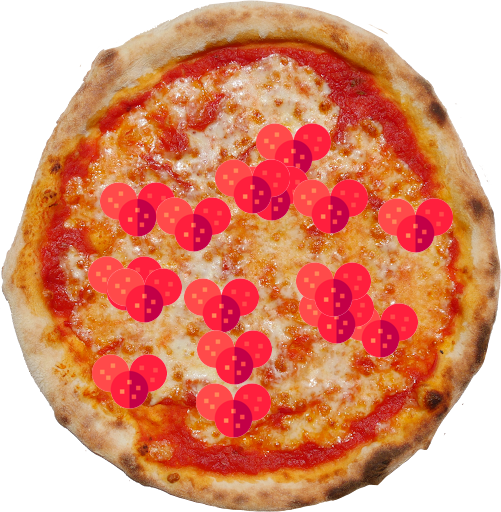

In [ ]:
import math
import random
from PIL import Image

# Create your pizza here!
YOUR_PIZZA_NAME = "altro"
BASE_PIZZA = "margherita"               # must be in `assets/pizzas`
TOPPINGS = ["anchovies", "arugala", "capers", "mushrooms", "olives", "pomodorini"]  # must be in `assets/toppings`
#random.seed(1) # for reproducibility, change this to change your pizza
                # comment to have a new pizza at each run

# Get the available toppings
toppings_available = []
for f in os.listdir(os.path.join(assets_dir, "toppings")):
    # To be "available" an topping must have an associated PNG image in the `assets/toppings` folder
    if f.endswith(".png"):
        topping = f.split(".")[0]
        toppings_available.append(topping)

# Import the 'base' pizza image
bg_img = Image.open(os.path.join(assets_dir,
                                 "pizzas",
                                 "{}.png".format(BASE_PIZZA))
                              )
bg_w, bg_h = bg_img.size


# Scatter topping images onto the pizza image
R = min(bg_h // 2, bg_w // 2) * 0.5     # adjust the gains to have toppings 
r = min(bg_h // 2, bg_w // 2) * 0.25    # closer or further from center.
d = 75  # [px] size of topping image. 
        # TODO. Make it relative to radius.
max_scattering = 90 # [px] maximum scattering wrt to seed position. 
                    # TODO. Make it relative to radius.
for topping in TOPPINGS:
    if topping not in toppings_available:
        print("'{}' is not in the available toppings.\n".format(topping.capitalize()) + 
        "The topping will not be added to your pizza.\n" +
        "Please add the corresponding `{}.png` image in the `assets` dir to make it available.".format(topping))
        continue
    top_img = Image.open(os.path.join(assets_dir,
                                      "toppings",
                                      "{}.png".format(topping)))
    top_img = top_img.resize((d, d))
    for i in range(-4, 4):
        ang = math.pi * i / 4
        # Each offset coordinate is made of three terms:
        #   - nominal position (add toppings regularly, in concentric circles)
        #   - random factor ("scatters" topping from nominal position)
        #   - icon size / 2 (move nominal position to topping center rather than corner)
        offset = (bg_w //2 + int(math.sin(ang) * R) +
                  int((random.random()-0.5)*max_scattering) -
                  d // 2, 
                  bg_h // 2 + int(math.cos(ang) * R) + 
                  int((random.random()-0.5)*max_scattering) -
                  d // 2,
                  )
        bg_img.paste(top_img, offset, top_img)
        offset = (bg_w // 2 + int(math.sin(ang) * r) + 
                  int((random.random()-0.5)*max_scattering) -
                  d // 2, 
                  bg_h // 2 + int(math.cos(ang) * r) + 
                  int((random.random()-0.5)*max_scattering) -
                  d // 2,
                  )
        bg_img.paste(top_img, offset, top_img) 
# Display the result
bg_img
# If you are satisfied, move to the next cell to save your pizza.
# Save-by-default is avoided to prevent overwriting.

In [6]:
# Save your pizza
bg_img.save(os.path.join(assets_dir,
                         "pizzas",
                         "{}.png".format(YOUR_PIZZA_NAME.lower().replace(" ",
                                                                          "_")
                                                                          )))